# Amazon Sentiment Analysis

## Author: Daniel Antantis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
reviews = pd.read_csv("amazon_reviews.csv")
reviews.head()

/Users/danielantantis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
reviews = reviews.dropna(subset = ['reviews.text', 'reviews.rating'])

In [4]:
clean_reviews = reviews[['name', 'reviews.rating', 'reviews.text']].rename(columns = {'reviews.rating' : 'rating', 'reviews.text': 'text'})
clean_reviews.head()

,name,rating,text
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,This product so far has not disappointed. My c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great for beginner or experienced person. Boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,Inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,I've had my Fire HD 8 two weeks now and I love...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,I bought this for my grand daughter when she c...


In [48]:
len(clean_reviews)

34626

In [5]:
clean_reviews['sentiments'] = clean_reviews.rating.apply(lambda x: 0 if x in [1, 2] else 1)
clean_reviews.head()

,name,rating,text,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,This product so far has not disappointed. My c...,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great for beginner or experienced person. Boug...,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,Inexpensive tablet for him to use and learn on...,1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,I bought this for my grand daughter when she c...,1


In [6]:
X = clean_reviews['text']
y = clean_reviews['sentiments']

<AxesSubplot:xlabel='rating', ylabel='count'>

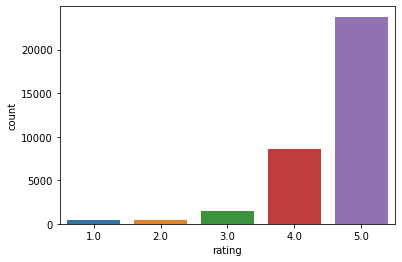

In [7]:
sns.countplot(x=clean_reviews['rating'])

In [8]:
clean_reviews['rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64

In [104]:
clean_reviews['sentiments'].value_counts()

1    33814
0      812
Name: sentiments, dtype: int64

## Logistic Regression w/ TF-IDF Vectorization

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.4, random_state=2023)

In [10]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [11]:
lr_model = LogisticRegression().fit(X_train_vect, y_train)

In [12]:
lr_score = lr_model.score(X_test_vect, y_test)
print(lr_score)

0.9768247779943686


In [13]:
lr_pred = lr_model.predict(X_test_vect)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print(tn, fp, fn, tp)

5 318 3 13525


In [28]:
precision = round(tp/(tp + fp), 3)
recall = round(tp/(tp+fn), 3)
print(precision)
print(recall)

0.977
1.0


## K-Nearest Neighbors

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn_tune_grid = {'n_neighbors': [3, 5, 7, 10, 12]}

In [18]:
knn_search = GridSearchCV(knn, knn_tune_grid, cv=3)
knn_search_results = knn_search.fit(X_train_vect, y_train)

In [19]:
print(knn_search_results.best_score_)
print(knn_search_results.best_params_)

0.9769434416365824
{'n_neighbors': 7}


In [20]:
knn_12 = KNeighborsClassifier(n_neighbors=12)
knn_12.fit(X_train_vect, y_train)

KNeighborsClassifier(n_neighbors=12)

In [21]:
knn_score = knn_12.score(X_test_vect, y_test)
print(knn_score)

0.9767525810410801


In [22]:
knn_pred = knn_12.predict(X_test_vect)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print(tn, fp, fn, tp)

4 319 3 13525


In [31]:
precision_knn = round(tp/(tp + fp), 3)
recall_knn = round(tp/(tp+fn), 3)
print(precision_knn)
print(recall_knn)

0.977
1.0


In [42]:
full_vect = vectorizer.transform(clean_reviews['text'])

In [43]:
knn_full_pred = knn_12.predict(full_vect)

## Default Threshold (0.5)

In [87]:
threshold = 0.5
prob_full_5 = np.where(knn_12.predict_proba(full_vect)[:, 1] > threshold, 1, 0)

In [90]:
tn, fp, fn, tp = confusion_matrix(clean_reviews['sentiments'], prob_full_5).ravel()
print(tn, fp, fn, tp)

18 794 4 33810


In [91]:
precision_full = round(tp/(tp + fp), 3)
sensitivity_full = round(tp/(tp+fn), 3)
specificity_full = round(tn/(tn+fp), 3)
print(precision_full)
print(sensitivity_full)
print(specificity_full)

0.977
1.0
0.022


## Increased Threshold

In [92]:
threshold = 0.7
prob_full_7 = np.where(knn_12.predict_proba(full_vect)[:, 1] > threshold, 1, 0)

In [93]:
tn, fp, fn, tp = confusion_matrix(clean_reviews['sentiments'], prob_full_7).ravel()
print(tn, fp, fn, tp)

134 678 61 33753


In [94]:
precision_full = round(tp/(tp + fp), 3)
sensitivity_full = round(tp/(tp+fn), 3)
specificity_full = round(tn/(tn+fp), 3)
print(precision_full)
print(sensitivity_full)
print(specificity_full)

0.98
0.998
0.165


In [95]:
threshold = 0.85
prob_full_85 = np.where(knn_12.predict_proba(full_vect)[:, 1] > threshold, 1, 0)

In [96]:
tn, fp, fn, tp = confusion_matrix(clean_reviews['sentiments'], prob_full_85).ravel()
print(tn, fp, fn, tp)

642 170 2434 31380


In [97]:
precision_full = round(tp/(tp + fp), 3)
sensitivity_full = round(tp/(tp+fn), 3)
specificity_full = round(tn/(tn+fp), 3)
print(precision_full)
print(sensitivity_full)
print(specificity_full)

0.995
0.928
0.791


In [98]:
threshold = 0.92
prob_full_92 = np.where(knn_12.predict_proba(full_vect)[:, 1] > threshold, 1, 0)

In [99]:
tn, fp, fn, tp = confusion_matrix(clean_reviews['sentiments'], prob_full_92).ravel()
print(tn, fp, fn, tp)

810 2 32916 898


In [100]:
precision_full = round(tp/(tp + fp), 3)
sensitivity_full = round(tp/(tp+fn), 3)
specificity_full = round(tn/(tn+fp), 3)
print(precision_full)
print(sensitivity_full)
print(specificity_full)

0.998
0.027
0.998


In the end it appears that a threshold of 0.85 appears to yield the most ideal metrics

In [101]:
best_pred = prob_full_85

## Try to Improve Data

In [102]:
pred_reviews = clean_reviews.copy()
pred_reviews['pred'] = best_pred

In [103]:
incorrect = pred_reviews[pred_reviews['sentiments'] != pred_reviews['pred']]
incorrect['sentiments'].value_counts()

1    2434
0     170
Name: sentiments, dtype: int64

The model appears to incorrecttly predict positive sentiments more often than negative sentiments, however overall the model only incorrectly predicts 7.2% of all positive sentiments (2434/33814) and 20.9% (170/812) of all negative sentiments. The next goal is try and increase the models ability to correctly predict negative sentiments without a significant reduction in its ability to predict positive sentiments.